# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [77]:
ans_1 = 17
print(f'The number of marketing campaigns represented in this data is {ans_1}.')

The number of marketing campaigns represented in this data is 17.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [78]:
import pandas as pd

In [79]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [80]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [81]:
# Analyze missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_summary = pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct})
if missing.sum() == 0:
    print("No missing values (NaN) in the dataset.")
else:
    print(missing_summary[missing_summary['missing_count'] > 0].sort_values('missing_count', ascending=False))

# Check for columns that need type conversion
print("\n" + "="*60)
print("Current dtypes")
print("="*60)
print(df.dtypes)

# Object encoding section
encoding_table = pd.DataFrame({
    'Feature': ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'],
    'Recommended Encoding': ['One-Hot Encoding', 'One-Hot Encoding', 'Ordinal Encoding', 'One-Hot Encoding', 'One-Hot Encoding', 'One-Hot Encoding', 'Binary Encoding', 'Cyclic Encoding', 'Cyclic Encoding', 'One-Hot Encoding'],
    'Number of Categories': [12, 4, 8, 3, 3, 3, 2, 10, 5, 3]
})
print("\n" + "="*60)
print("Object Encoding:")
print("="*60)
print(encoding_table.to_string(index=False))


No missing values (NaN) in the dataset.

Current dtypes
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Object Encoding:
    Feature Recommended Encoding  Number of Categories
        job     One-Hot Encoding                    12
    marital     One-Hot Encoding                     4
  education     Ordinal Encoding                     8
    default     One-Hot Encoding                     3
    housing     One-Hot Encoding                     3
       loan     One-Hot Encoding    

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

This is a binary classification problem where the goal is to predict whether a client 
will subscribe to a term deposit based on the features provided in the dataset.
The following models will be tested:
- K Nearest Neighbors
- Logistic Regression
- Decision Trees
- Support Vector Machines

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [82]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder

In [83]:
class CyclicalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, mapping, period):
        self.mapping = mapping
        self.period = period

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        x_mapped = pd.Series(X.iloc[:, 0]).map(self.mapping).fillna(0).values
        sin_feat = np.sin(2 * np.pi * x_mapped / self.period)
        cos_feat = np.cos(2 * np.pi * x_mapped / self.period)
        return np.column_stack([sin_feat, cos_feat])

    def get_feature_names_out(self, input_features=None):
        return [f"{input_features[0]}_sin", f"{input_features[0]}_cos"]

In [84]:
# Feature Definitions
num_features = [
    'age', 'duration', 'campaign', 'pdays', 'previous', 
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]
oh_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
edu_order = [
    'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 
    'high.school', 'professional.course', 'university.degree', 'unknown'
]
month_map = {'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 
             'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
day_map = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}

preprocessor = ColumnTransformer(
    transformers=[
        # Scaling numerical features
        ('num', StandardScaler(), num_features),
        
        # Encoding nominal features
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), oh_features),
        
        # Encoding ordinal education
        ('ordinal', OrdinalEncoder(categories=[edu_order], 
                                   handle_unknown='use_encoded_value', 
                                   unknown_value=-1), ['education']),
        
        # Cyclical transformations
        ('month_cyc', CyclicalEncoder(month_map, 12), ['month']),
        ('day_cyc', CyclicalEncoder(day_map, 5), ['day_of_week'])
    ]
)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X = df.drop('y', axis=1)
y = df['y'].map({'yes': 1, 'no': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [87]:
print(f"Number of No: {df['y'].value_counts()['no']}")
print(f"Number of Yes: {df['y'].value_counts()['yes']}\n")
baseline_accuracy = df['y'].value_counts().max() / len(df)
print(f"If we always guess no, our accuracy would be {baseline_accuracy:.2%}")

Number of No: 36548
Number of Yes: 4640

If we always guess no, our accuracy would be 88.73%


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [89]:
log_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('log_reg', LogisticRegression(max_iter=1000))
])
log_pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('log_reg', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('onehot', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different trans

### Problem 9: Score the Model

What is the accuracy of your model?

In [90]:
y_pred = log_pipe.predict(X_test)
log_acc = accuracy_score(y_test, y_pred)
log_precision = precision_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_f1 = f1_score(y_test, y_pred)
print(f"Logistic Regression accuracy: {log_acc:.2%}")
print(f"Logistic Regression precision: {log_precision:.2%}")
print(f"Logistic Regression recall: {log_recall:.2%}")
print(f"Logistic Regression f1: {log_f1:.2%}")

Logistic Regression accuracy: 91.16%
Logistic Regression precision: 67.51%
Logistic Regression recall: 42.67%
Logistic Regression f1: 52.29%


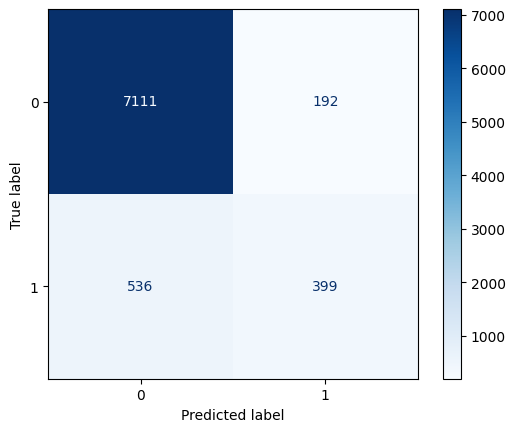

In [91]:
log_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_pipe['log_reg'].classes_)
disp.plot(cmap='Blues')
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [93]:
multi_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

param_grid = {
    'clf': [LogisticRegression(max_iter=1000), DecisionTreeClassifier(), SVC(), KNeighborsClassifier()]
}

multi_grid = GridSearchCV(multi_pipe, param_grid, cv=5)
multi_grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step..._iter=1000))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'clf': [LogisticRegre...max_iter=1000), DecisionTreeClassifier(), ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also 

In [94]:
print(f'Best model: {multi_grid.best_params_["clf"]}')

Best model: LogisticRegression(max_iter=1000)


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [95]:
def evaluate_model(model):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return acc, precision, recall, f1, cm

In [96]:
svc_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC())
])

svc_param_grid = {
    'svc__C': [0.01, 0.1, 1, 10]
}

svc_grid = GridSearchCV(svc_pipe, svc_param_grid, cv=5, verbose=2)
svc_grid.fit(X_train, y_train)

print(f'Best SVC model: {svc_grid.best_params_}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ........................................svc__C=0.01; total time=   3.5s
[CV] END ........................................svc__C=0.01; total time=   3.5s
[CV] END ........................................svc__C=0.01; total time=   3.4s
[CV] END ........................................svc__C=0.01; total time=   3.4s
[CV] END ........................................svc__C=0.01; total time=   3.4s
[CV] END .........................................svc__C=0.1; total time=   3.1s
[CV] END .........................................svc__C=0.1; total time=   3.2s
[CV] END .........................................svc__C=0.1; total time=   3.1s
[CV] END .........................................svc__C=0.1; total time=   3.1s
[CV] END .........................................svc__C=0.1; total time=   3.1s
[CV] END ...........................................svc__C=1; total time=   3.2s
[CV] END ........................................

SVC accuracy: 91.09%
SVC precision: 67.01%
SVC recall: 42.35%
SVC f1: 51.90%


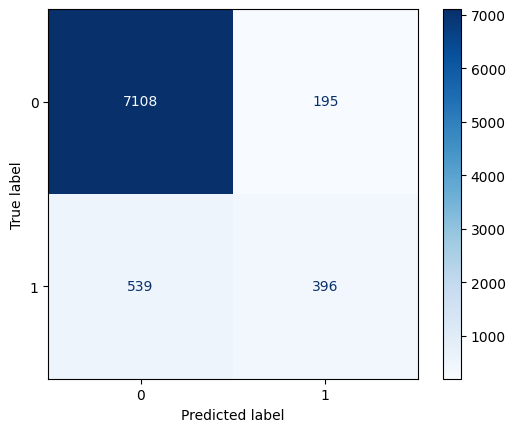

In [97]:
svc_acc, svc_precision, svc_recall, svc_f1, svc_cm = evaluate_model(svc_grid)
print(f"SVC accuracy: {svc_acc:.2%}")
print(f"SVC precision: {svc_precision:.2%}")
print(f"SVC recall: {svc_recall:.2%}")
print(f"SVC f1: {svc_f1:.2%}")
disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm, display_labels=svc_grid.classes_)
disp.plot(cmap='Blues')

In [98]:
log_param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10]
}

log_grid = GridSearchCV(log_pipe, log_param_grid, cv=5, verbose=2, refit=True)
log_grid.fit(X_train, y_train)

print(f'Best Logistic Regression model: {log_grid.best_params_}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ....................................log_reg__C=0.01; total time=   0.1s
[CV] END ....................................log_reg__C=0.01; total time=   0.0s
[CV] END ....................................log_reg__C=0.01; total time=   0.0s
[CV] END ....................................log_reg__C=0.01; total time=   0.0s
[CV] END ....................................log_reg__C=0.01; total time=   0.0s
[CV] END .....................................log_reg__C=0.1; total time=   0.1s
[CV] END .....................................log_reg__C=0.1; total time=   0.1s
[CV] END .....................................log_reg__C=0.1; total time=   0.1s
[CV] END .....................................log_reg__C=0.1; total time=   0.1s
[CV] END .....................................log_reg__C=0.1; total time=   0.1s
[CV] END .......................................log_reg__C=1; total time=   0.1s
[CV] END .......................................l

Logistic Regression accuracy: 91.11%
Logistic Regression precision: 67.29%
Logistic Regression recall: 42.25%
Logistic Regression f1: 51.91%


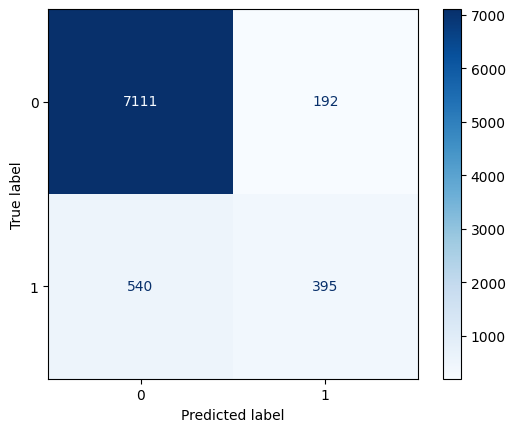

In [99]:
log_acc, log_precision, log_recall, log_f1, log_cm = evaluate_model(log_grid)
print(f"Logistic Regression accuracy: {log_acc:.2%}")
print(f"Logistic Regression precision: {log_precision:.2%}")
print(f"Logistic Regression recall: {log_recall:.2%}")
print(f"Logistic Regression f1: {log_f1:.2%}")
disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_grid.classes_)
disp.plot(cmap='Blues')

In [100]:
knn_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9]
}

knn_grid = GridSearchCV(knn_pipe, knn_param_grid, cv=5, verbose=2)
knn_grid.fit(X_train, y_train)

print(f'Best KNN model: {knn_grid.best_params_}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .................................knn__n_neighbors=3; total time=   0.1s
[CV] END .................................knn__n_neighbors=3; total time=   0.1s
[CV] END .................................knn__n_neighbors=3; total time=   0.1s
[CV] END .................................knn__n_neighbors=3; total time=   0.1s
[CV] END .................................knn__n_neighbors=3; total time=   0.1s
[CV] END .................................knn__n_neighbors=5; total time=   0.1s
[CV] END .................................knn__n_neighbors=5; total time=   0.1s
[CV] END .................................knn__n_neighbors=5; total time=   0.1s
[CV] END .................................knn__n_neighbors=5; total time=   0.1s
[CV] END .................................knn__n_neighbors=5; total time=   0.1s
[CV] END .................................knn__n_neighbors=7; total time=   0.1s
[CV] END .................................knn__n_

KNN accuracy: 90.40%
KNN precision: 61.54%
KNN recall: 41.07%
KNN f1: 49.26%


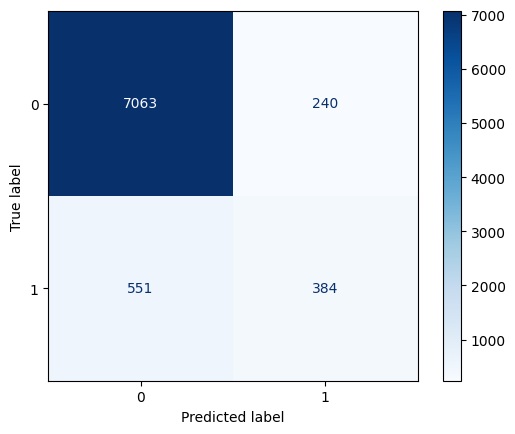

In [101]:
knn_acc, knn_precision, knn_recall, knn_f1, knn_cm = evaluate_model(knn_grid)
print(f"KNN accuracy: {knn_acc:.2%}")
print(f"KNN precision: {knn_precision:.2%}")
print(f"KNN recall: {knn_recall:.2%}")
print(f"KNN f1: {knn_f1:.2%}")
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn_grid.classes_)
disp.plot(cmap='Blues')

In [102]:
dtree_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('dtree', DecisionTreeClassifier())
])

dtree_param_grid = {
    'dtree__max_depth': [3, 5, 7, 9]
}

dtree_grid = GridSearchCV(dtree_pipe, dtree_param_grid, cv=5, verbose=2)
dtree_grid.fit(X_train, y_train)

print(f'Best Decision Tree model: {dtree_grid.best_params_}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .................................dtree__max_depth=3; total time=   0.1s
[CV] END .................................dtree__max_depth=3; total time=   0.1s
[CV] END .................................dtree__max_depth=3; total time=   0.1s
[CV] END .................................dtree__max_depth=3; total time=   0.1s
[CV] END .................................dtree__max_depth=3; total time=   0.1s
[CV] END .................................dtree__max_depth=5; total time=   0.1s
[CV] END .................................dtree__max_depth=5; total time=   0.1s
[CV] END .................................dtree__max_depth=5; total time=   0.1s
[CV] END .................................dtree__max_depth=5; total time=   0.1s
[CV] END .................................dtree__max_depth=5; total time=   0.1s
[CV] END .................................dtree__max_depth=7; total time=   0.1s
[CV] END .................................dtree__

Decision Tree accuracy: 91.47%
Decision Tree precision: 65.03%
Decision Tree recall: 53.69%
Decision Tree f1: 58.82%


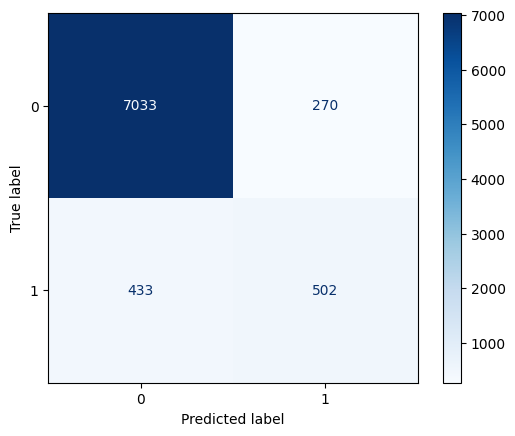

In [103]:
dtree_acc, dtree_precision, dtree_recall, dtree_f1, dtree_cm = evaluate_model(dtree_grid)
print(f"Decision Tree accuracy: {dtree_acc:.2%}")
print(f"Decision Tree precision: {dtree_precision:.2%}")
print(f"Decision Tree recall: {dtree_recall:.2%}")
print(f"Decision Tree f1: {dtree_f1:.2%}")
disp = ConfusionMatrixDisplay(confusion_matrix=dtree_cm, display_labels=dtree_grid.classes_)
disp.plot(cmap='Blues')

In [104]:
best_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', DecisionTreeClassifier(max_depth=5))
])

best_pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('onehot', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transform

In [105]:
best_acc, best_precision, best_recall, best_f1, best_cm = evaluate_model(best_pipe)
print(f"Best accuracy: {best_acc:.2%}")
print(f"Best precision: {best_precision:.2%}")
print(f"Best recall: {best_recall:.2%}")
print(f"Best f1: {best_f1:.2%}")

Best accuracy: 91.47%
Best precision: 65.03%
Best recall: 53.69%
Best f1: 58.82%


##### Questions